# Plotting and comparing OBPs between our stochastic game (value iteration) and empirical values

In [1]:
# Import appropriate libraries
import pandas, json, requests, urllib, io
import numpy as np        
import matplotlib.pyplot as plt

In [2]:
# Open empirical and stochastic game results

with open("empirical_state_outcomes.json") as infile:
    empirical = json.load(infile)
with open("value_iter_outcomes.json") as infile:
    value_iter = json.load(infile)

In [4]:
# Dictionary mapping each third value to qualitative ability
group_map = {
    '0':'Weak',
    '1':'Average',
    '2':'Strong'
}

In [7]:
# Import plotting library and change setting for Latex

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("pdf")
matplotlib.rcParams.update({
    'font.family': 'serif',
})

In [8]:
# Plot OBPs across counts for stochastic game and empirical values
# Group: string "AB", where A = pitcher quality and B = batter quality; A,B is from {"0","1","2"}

def plot_group(group,empirical,value_iter):
    print("STARTED")   
    labels = empirical[group].keys()
    emp_means = []
    val_means = []
    emp_yerr = []
    val_yerr = []

    for label in labels:
        emp_at_count = np.array(empirical[group][label])
        emp_mean = np.mean(emp_at_count)
        emp_std = np.std(emp_at_count)
        emp_len = emp_at_count.shape[0]
        emp_err = (1.96*emp_std/np.sqrt(emp_len))
        print(type(emp_err))
        emp_yerr.append(emp_err)
        emp_means.append(emp_mean)
        
        value_iter_at_count = np.array(value_iter[group][label])[:,0]
        val_mean = np.mean(value_iter_at_count)
        val_std = np.std(value_iter_at_count)
        val_len = value_iter_at_count.shape[0]
        val_err = 2*(1.96*val_std/np.sqrt(val_len))
        print(val_err)
        val_yerr.append(val_err)
        val_means.append(val_mean)

    print(emp_yerr)
    print(val_yerr)
    emp_yerr = emp_yerr
    data = np.arange(len(labels))  
    width = 0.3 
    dist = .08

    fig, ax = plt.subplots()
    fig.set_size_inches(w=4.2, h=3.2)
    rect1 = ax.bar(data - width/2-dist/2, emp_means, width, yerr= emp_yerr, label='Empirical',  color="tomato")
    rect2 = ax.bar(data + width/2+dist/2, val_means, width, yerr= val_yerr, label='SG',  color="dodgerblue")
    
    
    def autolabel(rects, yerrs):

        for i in range(len(rects)):
            rect = rects[i]
            yerr = yerrs[i]
            height = rect.get_height()

            print(height)
            ax.text(rect.get_x() + rect.get_width()/2., height+yerr+.05,
                    '%.3f' % float(height), rotation=90,
                    ha='center', va='bottom')
    #autolabel(rect1, emp_yerr)
    #autolabel(rect2, val_yerr)
    ax.set_ylim([0,1])
    ax.set_ylabel('State Value (OBP at State)') 
    ax.set_xlabel('Count')
    ax.set_title("%s Pitchers vs. %s Batters" %(group_map[group[0]], group_map[group[1]]))
    ax.set_xticks(data)
    ax.set_xticklabels(labels)
    ax.legend(loc='upper center', ncol=2)
    
    file_name = '%s_p_%s_b_sg.pdf'%(group_map[group[0]], group_map[group[1]])
    print(file_name)

    #fig.tight_layout()

    plt.show()
    plt.savefig(file_name,dpi=120)

STARTED
<class 'numpy.float64'>
0.007649738233650569
<class 'numpy.float64'>
0.007178483858137376
<class 'numpy.float64'>
0.00706813236005225
<class 'numpy.float64'>
0.008057863888471645
<class 'numpy.float64'>
0.006963858794523501
<class 'numpy.float64'>
0.006934619532469428
<class 'numpy.float64'>
0.008532844399809099
<class 'numpy.float64'>
0.007251192005895507
<class 'numpy.float64'>
0.006361387725911686
<class 'numpy.float64'>
0.006122370123421647
<class 'numpy.float64'>
0.006417042566288014
<class 'numpy.float64'>
0.005198389151730228
[0.014768738608365407, 0.019595662016950847, 0.025667189445226456, 0.024289419230777008, 0.022571320521545188, 0.021504980856430156, 0.04232837413489061, 0.031663732641736865, 0.024340216534138467, 0.06384388511569973, 0.04894297636092611, 0.031540280958112385]
[0.007649738233650569, 0.007178483858137376, 0.00706813236005225, 0.008057863888471645, 0.006963858794523501, 0.006934619532469428, 0.008532844399809099, 0.007251192005895507, 0.0063613877259

/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


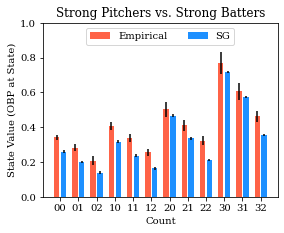

In [17]:

plot_group("22", empirical,value_iter)

# Overall Reductions

In [8]:
# Prints overall reductions for specified count for all pitcher/batter group matchups

def print_reductions(count):
    total_empirical = []
    total_val_iter = []



    for group in empirical.keys():
        group_emp = empirical[group][count]
        total_empirical = total_empirical + group_emp
        #print(np.array(value_iter[group][count])[:,0])
        group_val = list(np.array(value_iter[group][count])[:,0])
        total_val_iter = total_val_iter + group_val

        g_emp_mean = np.mean(np.array(group_emp))
        g_val_mean = np.mean(np.array(group_val))
        print(group)
        print("EMP")
        print(g_emp_mean)
        print("PRED")
        print(g_val_mean)
        print("PERC RED")
        print((g_emp_mean-g_val_mean)/g_emp_mean)
        print(">>>>>>")

    #print(total_empirical)
    #print(total_val_iter)
    emp_mean = np.mean(np.array(total_empirical))
    val_mean = np.mean(np.array(total_val_iter))


    reduction = (emp_mean-val_mean)/emp_mean
    print("EMP MEAN OBP AT COUNT %s :%.4f"%(count,emp_mean))
    print("VAL ITER MEAN OBP AT COUNT %s :%.4f"%(count,val_mean))
    print("%.4f PERCENT REDUCTION"%(reduction))
print_reductions("00")

00
EMP
0.2930232558139535
PRED
0.22073387037995132
PERC RED
0.24670187092556298
>>>>>>
01
EMP
0.34730113636363635
PRED
0.25756185355790717
PERC RED
0.25839040938745744
>>>>>>
02
EMP
0.41189801699716716
PRED
0.2757462099030316
PERC RED
0.33054737210612
>>>>>>
10
EMP
0.24857468643101482
PRED
0.20924167120789483
PERC RED
0.15823419426915702
>>>>>>
11
EMP
0.3236196319018405
PRED
0.24370826634534923
PERC RED
0.24692990683806784
>>>>>>
12
EMP
0.37342135476463834
PRED
0.2627391244372302
PERC RED
0.29640037698746347
>>>>>>
20
EMP
0.252470799640611
PRED
0.20998103981947103
PERC RED
0.1682957390780383
>>>>>>
21
EMP
0.27533830433581885
PRED
0.24161606968161264
PERC RED
0.1224756385986767
>>>>>>
22
EMP
0.34191269240474387
PRED
0.2593175395025763
PERC RED
0.2415679638016901
>>>>>>
EMP MEAN OBP AT COUNT 00 :0.3287
VAL ITER MEAN OBP AT COUNT 00 :0.2423
0.2630 PERCENT REDUCTION


/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.
